<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#CAM" data-toc-modified-id="CAM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CAM</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np 
import sys
sys.path.append('../code')

from dataload import cifar10_load, mnist_load
from saliency.attribution_methods import CAM
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist',attention='CAM')

Data Complete
filename:  simple_cnn_mnist_CAM
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10',attention='CAM')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
filename:  simple_cnn_cifar10_CAM
Model Complete


# CAM

In [4]:
CAM_mnist = CAM(mnist_model)
CAM_cifar10 = CAM(cifar10_model)

# MNIST

In [6]:
# CAM
outputs, probs, preds = CAM_mnist.generate_image(pre_images_mnist, original_targets_mnist)

# ensemble
n = 50
sigma = 2
# CAM + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, CAM_mnist, layer=11)
# CAM + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, CAM_mnist, layer=11)
# CAM + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, CAM_mnist, layer=11)

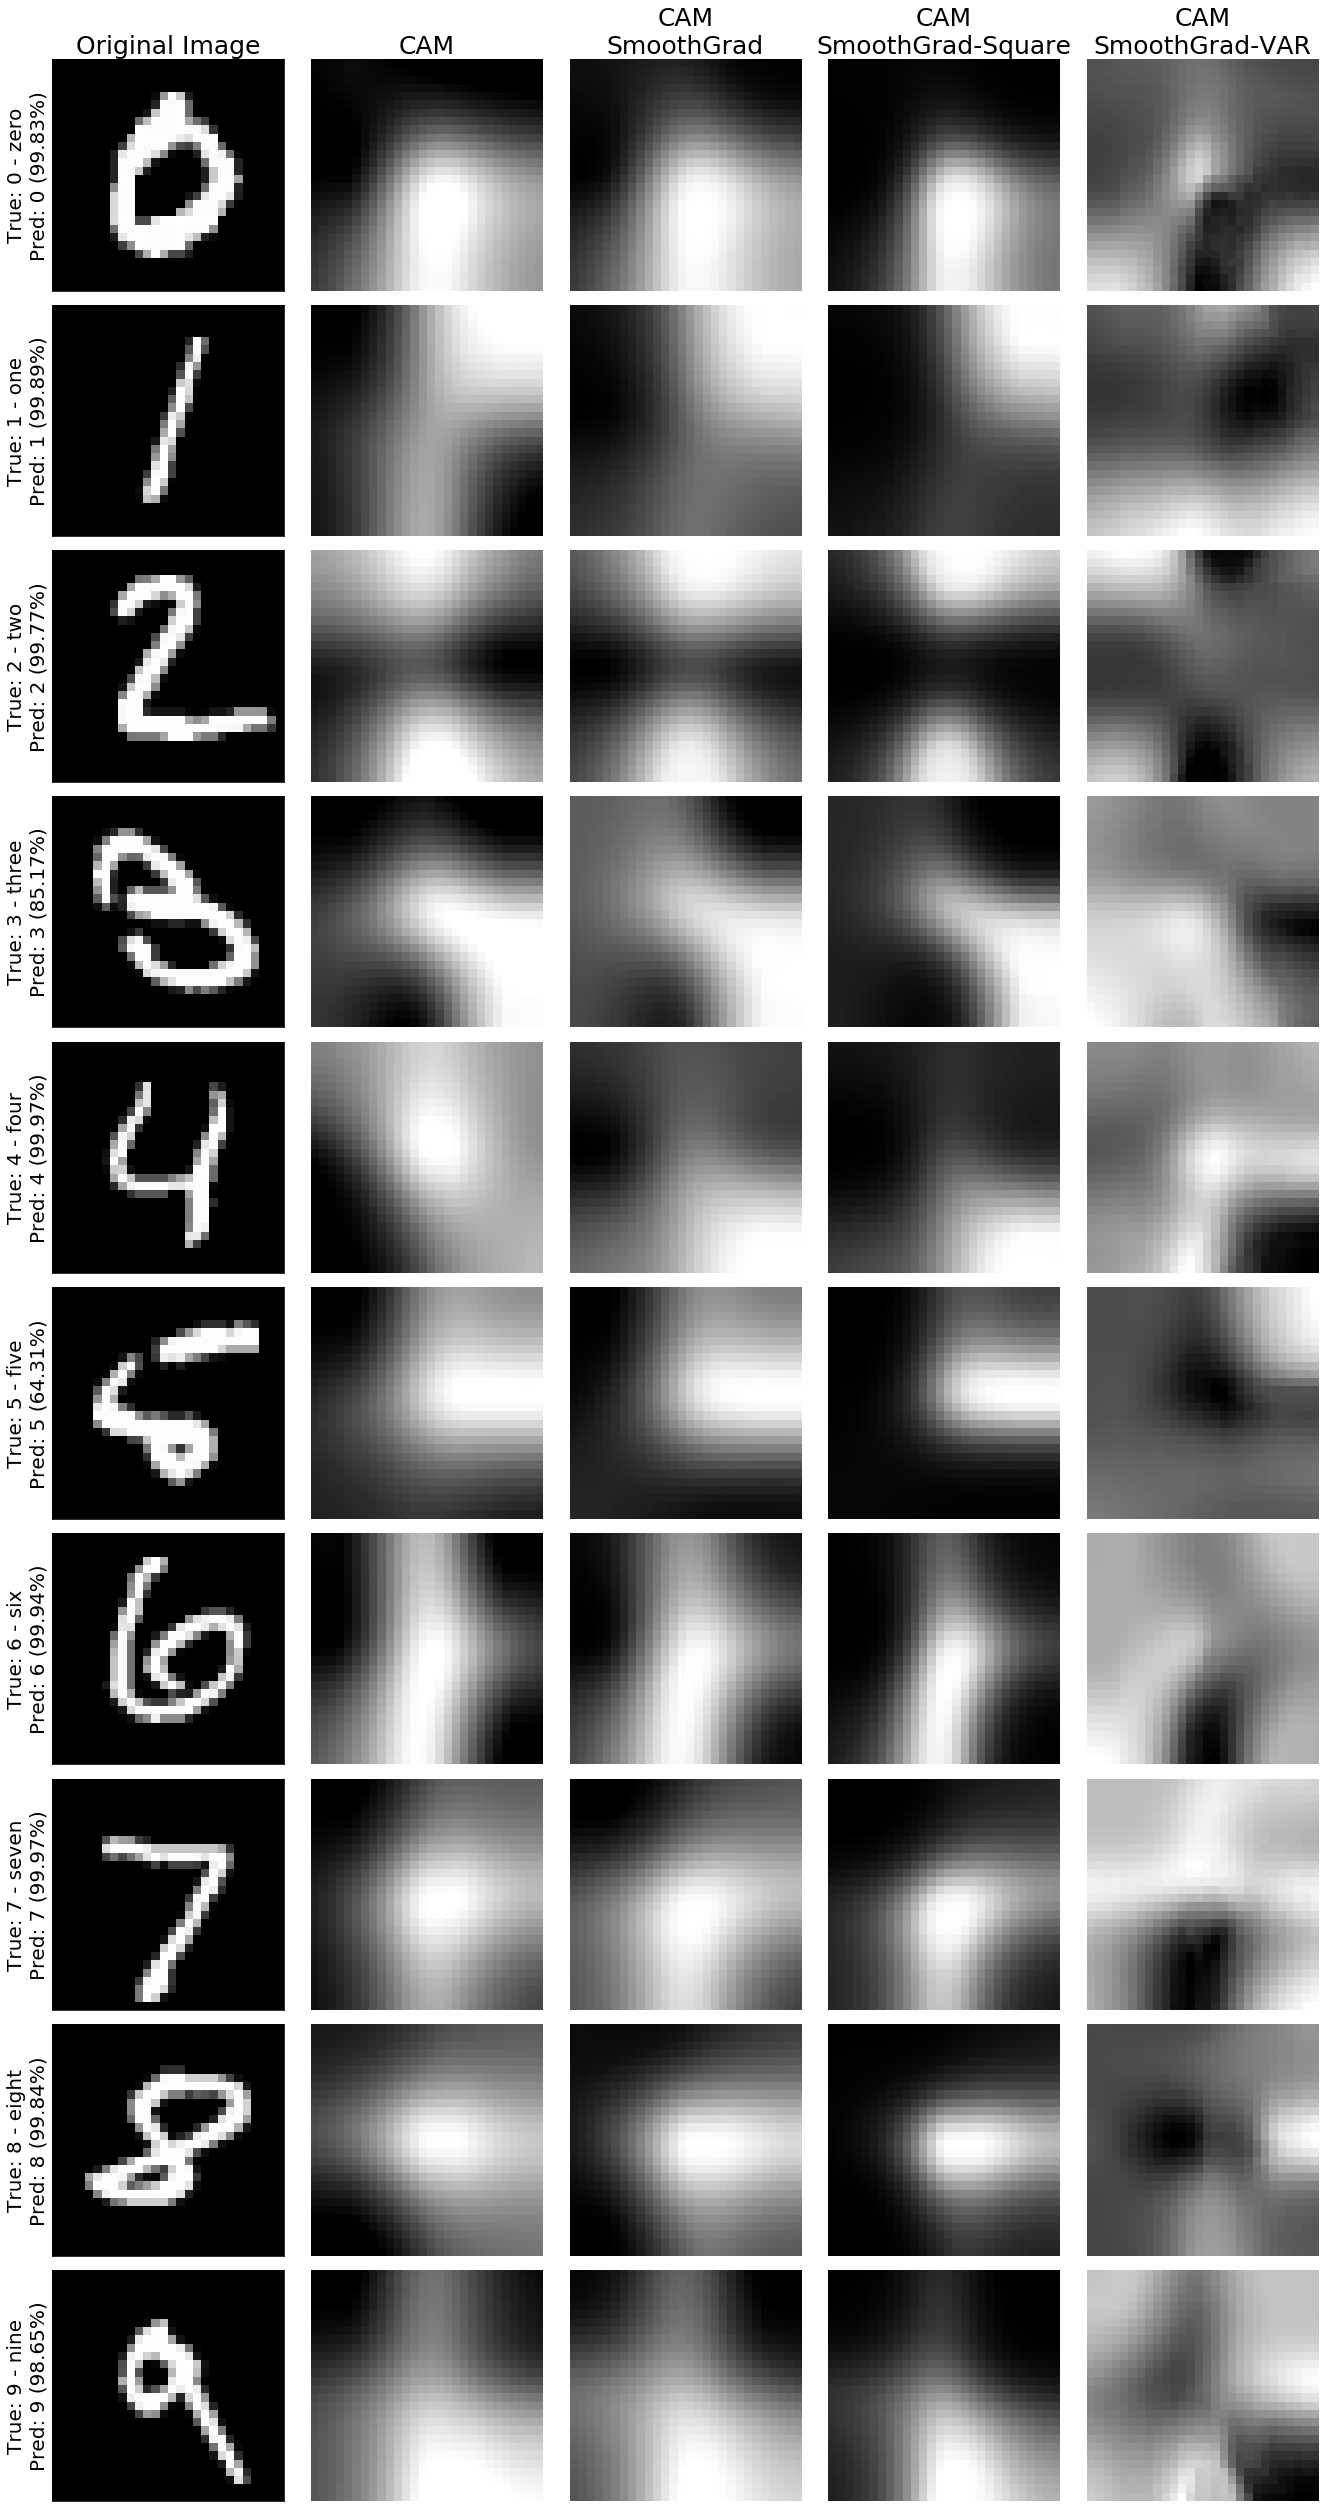

In [7]:
input_outputs = (outputs * 0.5 + original_images_mnist * 0.5).astype(int)

names = ['CAM',
         'CAM\nSmoothGrad','CAM\nSmoothGrad-Square','CAM\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [9]:
# CAM
outputs, probs, preds = CAM_cifar10.generate_image(pre_images_cifar10, original_targets_cifar10, color=True)

# ensemble
n = 50
sigma = 2
# CAM + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, CAM_cifar10, layer=11, color=True)
# CAM + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, CAM_cifar10, layer=11, color=True)
# CAM + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, CAM_cifar10, layer=11, color=True)

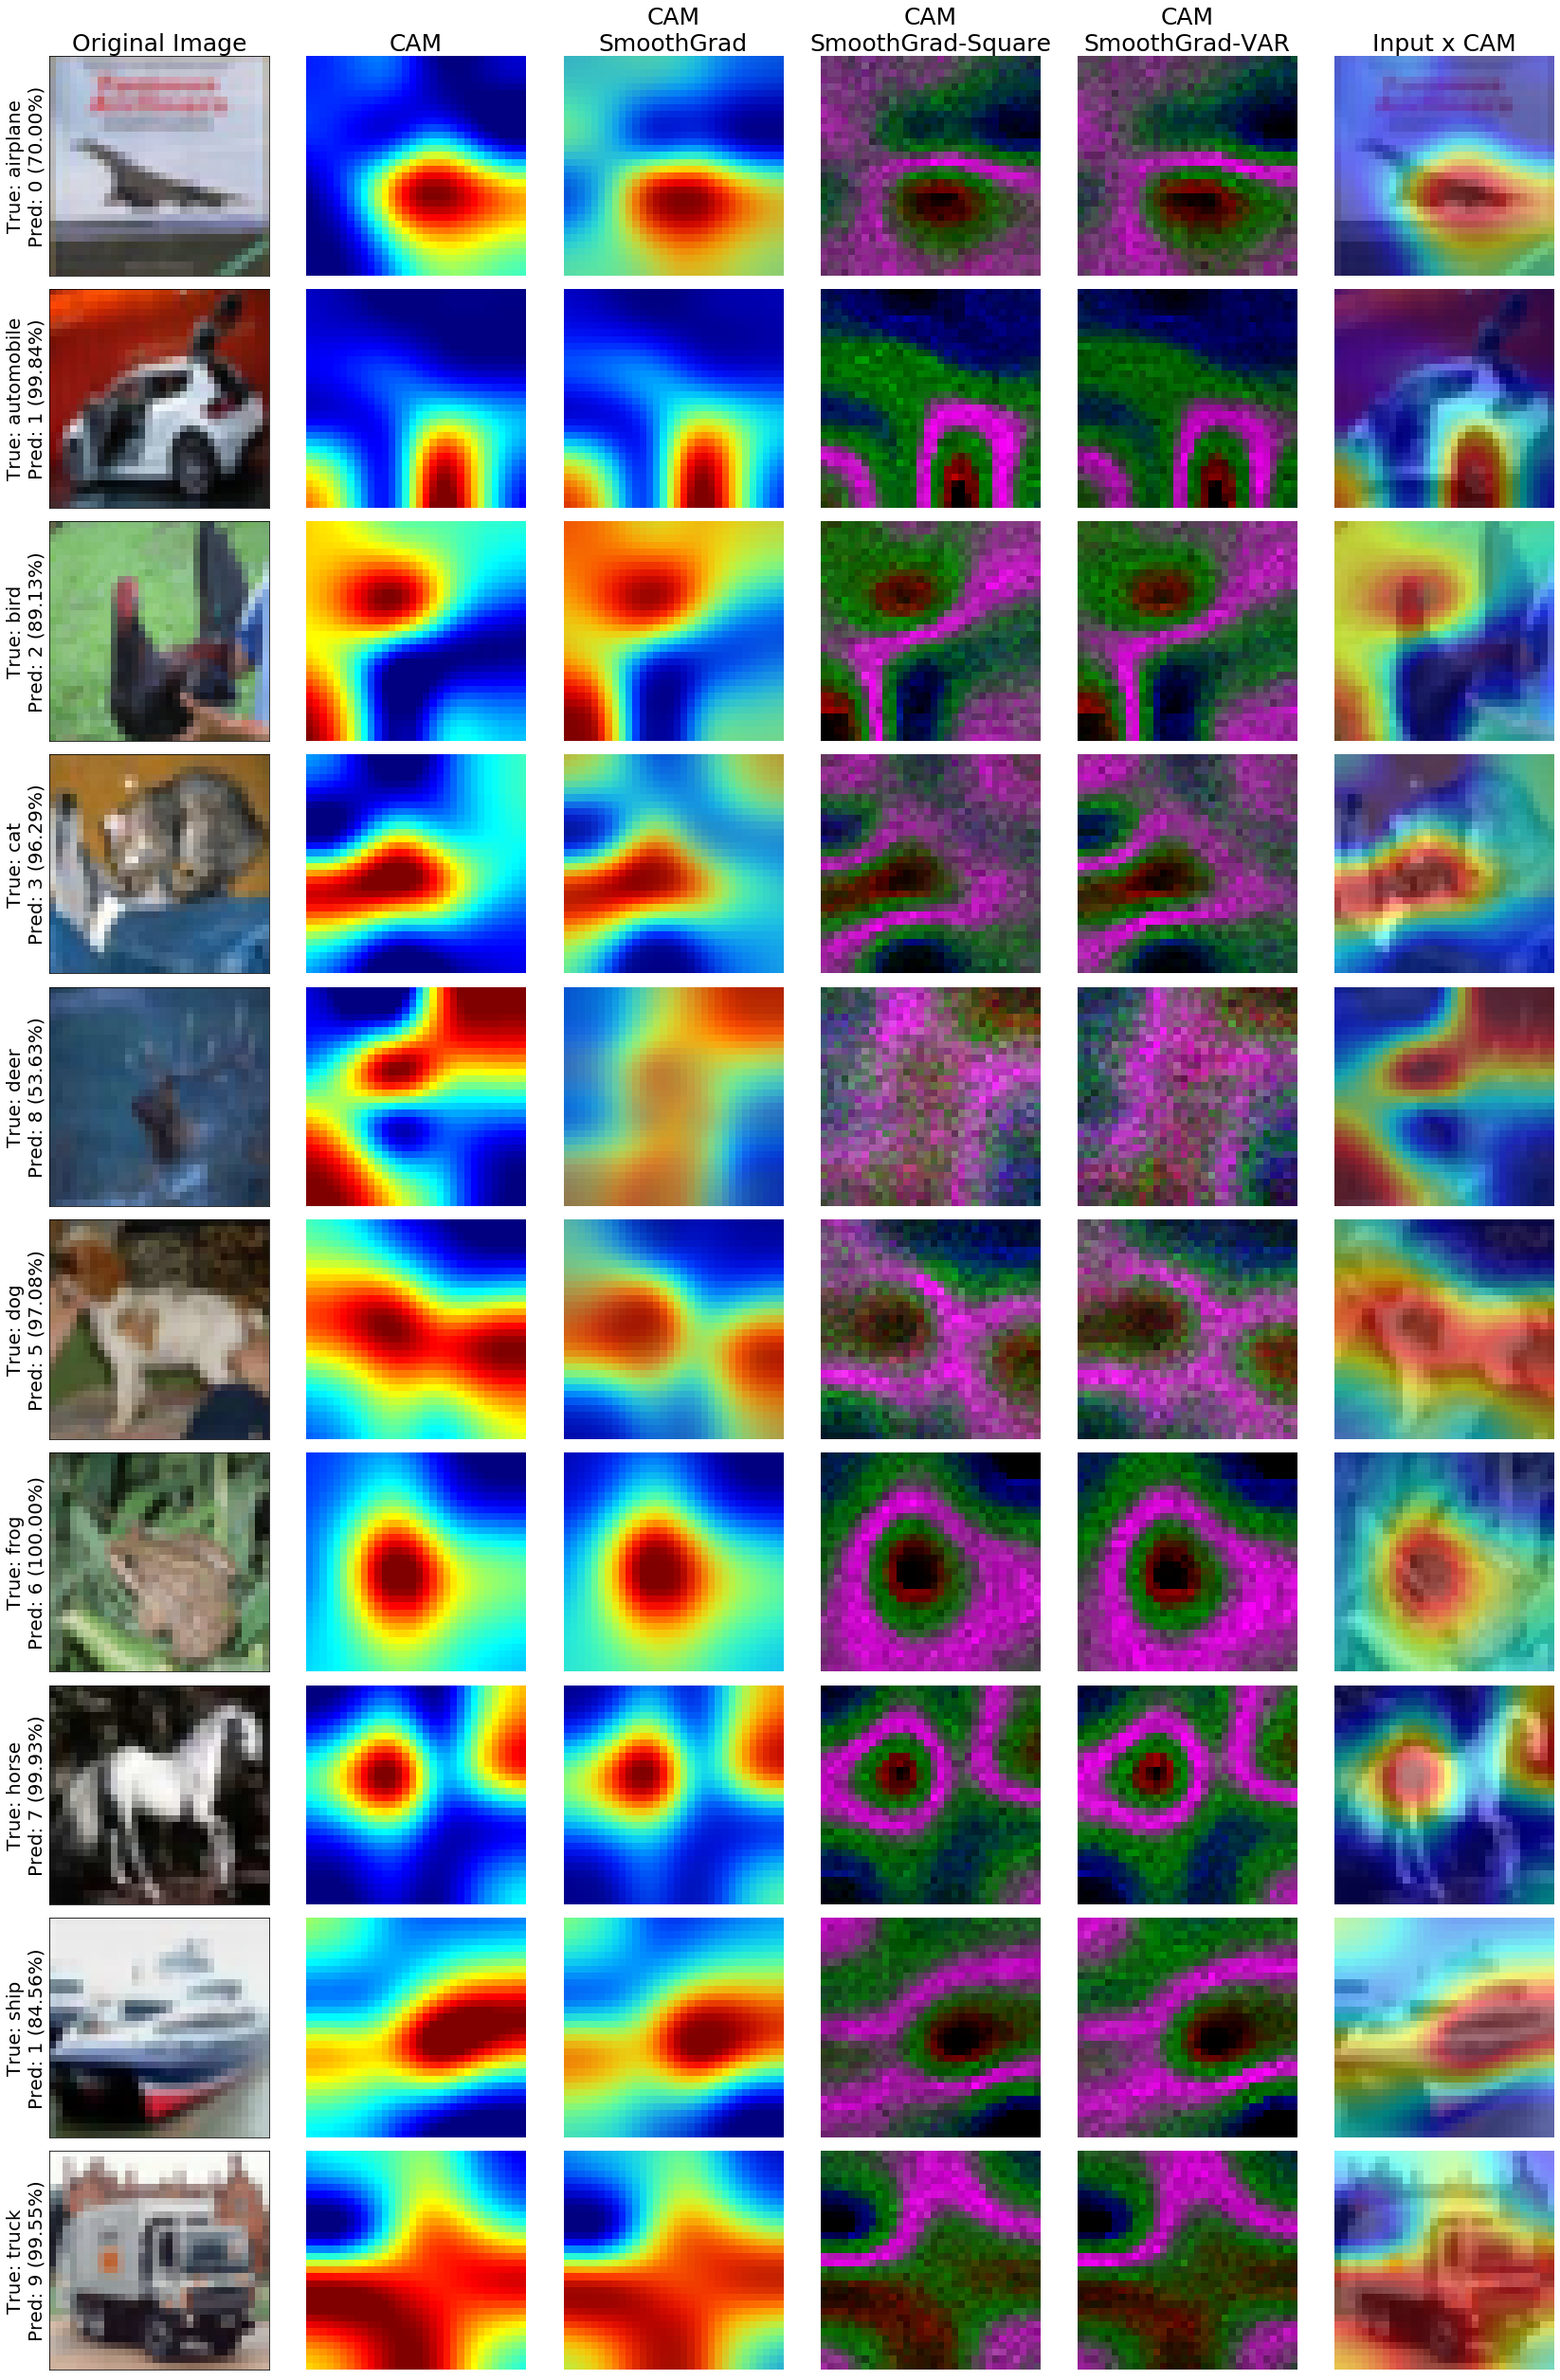

In [10]:
input_outputs = (outputs * 0.5 + original_images_cifar10 * 0.5).astype(int)

names = ['CAM',
         'CAM\nSmoothGrad','CAM\nSmoothGrad-Square','CAM\nSmoothGrad-VAR', 'Input x CAM'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR, input_outputs]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=6, row=10, size=(25,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [11]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [12]:
CAM_mnist.save_saliency_map(trainloader, '../saliency_maps/[mnist]CAM_train.hdf5')
CAM_mnist.save_saliency_map(validloader, '../saliency_maps/[mnist]CAM_valid.hdf5')
CAM_mnist.save_saliency_map(testloader, '../saliency_maps/[mnist]CAM_test.hdf5')

CAM:   2%|███▌                                                                                                                                                                    | 2/94 [00:00<00:08, 11.02it/s]

Save saliency maps


CAM:   3%|████▎                                                                                                                                                                   | 2/79 [00:00<00:06, 11.33it/s]

Save saliency maps


CAM: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:08<00:00,  9.84it/s]

Save saliency maps


## CIFAR10

In [13]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [15]:
CAM_cifar10.save_saliency_map(trainloader, '../saliency_maps/[cifar10]CAM_train.hdf5', color=True)
CAM_cifar10.save_saliency_map(validloader, '../saliency_maps/[cifar10]CAM_valid.hdf5', color=True)
CAM_cifar10.save_saliency_map(testloader, '../saliency_maps/[cifar10]CAM_test.hdf5', color=True)

CAM:   1%|██▏                                                                                                                                                                     | 1/79 [00:00<00:11,  6.55it/s]

Save saliency maps


CAM:   1%|██▏                                                                                                                                                                     | 1/79 [00:00<00:10,  7.61it/s]

Save saliency maps


CAM: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:14<00:00,  5.45it/s]


Save saliency maps
